# Fixing fit_all_random
So that comparing with the permuted model on randomized data

# FINAL CONCLUSION: local null is about the same as global null. Consider the two lasso runs in here. Local is a bit conservative

In [2]:
import numpy as np
import pandas as pd
import pickle
import sys
import os
import collections
import geneTSmunging as gtm
import fdr_control as fc
import network_helpers as nh
import causal_pipeline as cp
import matplotlib.pyplot as plt
import matplotlib as mpl
import lag_conversion as lc
from scipy import misc
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
# Load all the data, get networks

data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)

best_hyper = 0.001

assert (geneTS.shape == geneTSr.shape)
assert (genes == genesr).all()

In [45]:
print geneTS.shape

Y_row = 3

Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))
print geneTS[0:3]
print geneTSr[0:3]
print Y

coef, _ = perform_test_random(geneTS, geneTSr, Y, 2, fit_ridge, replace_row=Y_row, has_reps=True, hyper=1,
                             verbose=True)

(100, 12, 4)
[[[ 1.04815008  0.15697452  1.14644533  0.06448708]
  [ 0.35252544  0.36357418  1.76973776  0.54022089]
  [-0.08186088  0.91064576  0.04865903  1.34849226]
  [-0.2044819   0.4812579  -0.07889639  0.26974276]
  [-2.31428473 -0.79642493 -1.33135121 -1.98472909]
  [-0.70075182 -0.6861743   0.38486192  0.30220347]
  [ 0.07686832 -2.32372308 -1.50407265 -0.77589246]
  [ 0.85448847  0.41139869 -0.65562042 -0.80313786]
  [ 1.63210862 -1.09424698 -1.12453682  0.98329854]
  [ 0.0883757   1.53299601  0.87552008  1.46494393]
  [-1.14753839  0.43216449 -0.39433826 -1.16786434]
  [ 0.39640109  0.61155774  0.86359162 -0.24176517]]

 [[-1.38517404 -0.9834013  -0.63246985 -0.33581789]
  [-0.68286158 -1.28910378  1.03681572 -1.3481128 ]
  [ 0.52423681 -0.85858451 -0.1496953  -0.76377525]
  [ 0.10444312  0.37288621 -0.49833842 -0.08629339]
  [-1.06936983  0.11201798 -0.65165272 -0.41095736]
  [-1.27667687  0.26171019 -0.9606004  -1.32473093]
  [-0.67965647 -0.82769828 -1.95986853 -0.5232652

ValueError: too many values to unpack

In [58]:
rows = [3,5,7]
geneTSy = geneTS[rows, :]
print geneTSy.shape

fit_all_random(geneTS, geneTSr, geneTSy, rows, 2, fit_ridge, hyper=10, has_reps=has_reps)

(3, 12, 4)


(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
    DW:Lag1_mean  DW:Lag1_std  df_mean  df_std  hyper  mse_mean   mse_std  \
 0      2.593037     0.132509    200.0     0.0     10  0.029415  0.003896   
 1      2.575408     0.065221    200.0     0.0     10  0.017506  0.001478   
 2      1.319211     0.078628    200.0     0.0     10  0.017906  0.001251   
 
    n_mean  n_std   r2_mean    r2_std  row  sse_mean   sse_std  
 0    40.0    0.0  0.969538  0.004035    3  1.176612  0.155849  
 1    40.0    0.0  0.980887  0.001614    5  0.700248  0.059137  
 2    40.0    0.0  0.971430  0.001996    7  0.716229  0.050039  )

# 1/25/17
Confirmed. All correct output.

(100, 12, 4)
(200, 1)
(200, 1)
OrderedDict([('r2', 0.98256863612821832), ('mse', 0.016832168679001763), ('sse', 0.67328674716007053), ('n', 40), ('df', 200), ('DW:Lag1', 3.2721363135289421)])
OrderedDict([('r2', 0.9999703843576786), ('mse', 2.8597618107054558e-05), ('sse', 0.0011439047242821822), ('n', 40), ('df', 200), ('DW:Lag1', 1.6669204199448786)])
{'r2': 0.98256863612821987, 'df': 200.0, 'DW:Lag1': 3.272136313528943, 'n': 40.0, 'sse': 0.67328674716007031, 'mse': 0.016832168679001783}
{'r2': 0.99237490519335692, 'df': 200.0, 'DW:Lag1': 3.0176589029743708, 'n': 40.0, 'sse': 0.2945194258415208, 'mse': 0.0073629856460380241}


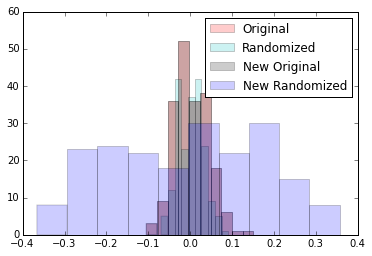

In [65]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 3
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 1

_, _, _, coef, _, fit_result = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=True, hyper=hyper)
_, _, _, coefr, _, fit_resultr = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=True, hyper=hyper)

coef2, fit_result2 = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=True, verbose=False, hyper=hyper)
coef2r, fit_result2r = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=True, verbose=False, hyper=hyper)

acoef = lc.remove_alphas(lc.align_coefs(coef, lag), lag)
acoefr = lc.remove_alphas(lc.align_coefs(coefr, lag), lag)
acoef2 = lc.remove_alphas(lc.align_coefs(coef2, lag), lag)
acoef2r = lc.remove_alphas(lc.align_coefs(coef2r, lag), lag)




print fit_result
print fit_resultr

print fit_result2
print fit_result2r



plt.hist(coef.flatten(), color='r', alpha=0.2, label="Original")
plt.hist(coefr.flatten(), color='c', alpha=0.2, label="Randomized")
plt.hist(coef2.flatten(), color='k', alpha=0.2, label="New Original")
plt.hist(coef2r.flatten(), color='b', alpha=0.2, label="New Randomized")
plt.legend()
plt.show()
plt.close()

In [90]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 4
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 1

_, _, _, coef, _, fit_result = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=True, hyper=hyper)
_, _, _, coefr, _, fit_resultr = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=True, hyper=hyper)

coef2, fit_result2 = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=True, verbose=False, hyper=hyper)
coef2r, fit_result2r = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=True, verbose=False, hyper=hyper)

acoef = lc.remove_alphas(lc.align_coefs(coef, lag), lag)
acoefr = lc.remove_alphas(lc.align_coefs(coefr, lag), lag)
acoef2 = lc.remove_alphas(lc.align_coefs(coef2, lag), lag)
acoef2r = lc.remove_alphas(lc.align_coefs(coef2r, lag), lag)




print fit_result
print fit_resultr

print fit_result2
print fit_result2r



plt.hist(coef.flatten(), color='r', alpha=0.2, label="Original")
plt.hist(coefr.flatten(), color='c', alpha=0.2, label="Randomized")
plt.hist(coef2.flatten(), color='k', alpha=0.2, label="New Original")
plt.hist(coef2r.flatten(), color='b', alpha=0.2, label="New Randomized")
plt.legend()
plt.show()
plt.close()

(100, 12, 4)


ValueError: too many values to unpack

## 1/17/17: Log of above new implementation

Check it out: original and replicated are the same, so the randomized method is getting the exact correct?
SHould that be happening???
Yes, it should be exactly the same from the switch


In [77]:
lc.align_coefs(coef, lag)


[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

IndexError: index 1 is out of bounds for axis 1 with size 1

In [81]:
print coef
print "COEF"
print np.split(coef, lag)

[[-0.01503898]
 [-0.033466  ]
 [ 0.03956589]
 [ 0.0228361 ]
 [ 0.08023163]
 [-0.06754663]
 [-0.02932234]
 [-0.00050755]
 [ 0.01467201]
 [ 0.00149027]
 [-0.00853728]
 [-0.00578063]
 [ 0.00705997]
 [-0.00138034]
 [ 0.0315567 ]
 [ 0.04094035]
 [ 0.00695372]
 [-0.01668423]
 [-0.00050961]
 [ 0.02619918]
 [ 0.02050653]
 [ 0.02511657]
 [-0.00415755]
 [ 0.04476705]
 [ 0.0189009 ]
 [-0.05305404]
 [ 0.02540046]
 [ 0.02822178]
 [-0.01708668]
 [ 0.06003058]
 [-0.00256737]
 [-0.02422564]
 [ 0.01431655]
 [-0.03314195]
 [ 0.00223579]
 [-0.028561  ]
 [-0.00508554]
 [ 0.003103  ]
 [ 0.02720587]
 [ 0.02211988]
 [-0.0071715 ]
 [ 0.00967867]
 [-0.0013526 ]
 [ 0.00478655]
 [ 0.02257734]
 [ 0.00673307]
 [ 0.00228363]
 [ 0.01686764]
 [-0.00733374]
 [ 0.00770192]
 [ 0.02266444]
 [ 0.01246193]
 [ 0.00578597]
 [-0.00114526]
 [-0.01317796]
 [ 0.03521268]
 [-0.08061553]
 [ 0.00431498]
 [-0.01365142]
 [-0.0397638 ]
 [-0.01248031]
 [ 0.01772261]
 [ 0.01610857]
 [-0.00896559]
 [-0.01133464]
 [-0.02455005]
 [-0.00283

(100, 12)
(200, 1)
(200, 1)
{'r2': 0.99976055811345499, 'df': 200.0, 'DW:Lag1': 2.7962489004687332, 'n': 10.0, 'sse': 0.0020999565935739557, 'mse': 0.00020999565935739606}
{'r2': 0.99977132770053045, 'df': 200.0, 'DW:Lag1': 2.7896170079487179, 'n': 10.0, 'sse': 0.0020055050098792297, 'mse': 0.00020055050098792296}


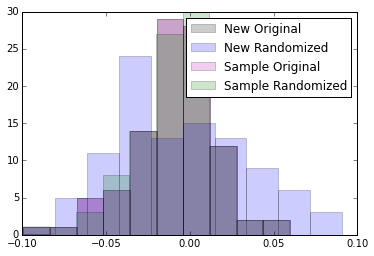

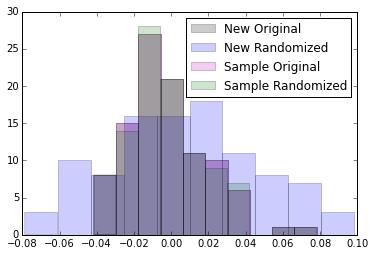

In [89]:
data_file = "small_edgeR-reg-avg-norm-100.txt"
rand_data_file = "small_edgeR-reg-randomized-avg-norm-100.txt"

has_reps=False

df = pd.read_csv(data_file, sep="\t")
genes, geneTS = gtm.get_gene_TS(df)
dfr = pd.read_csv(rand_data_file, sep="\t")
genesr, geneTSr = gtm.get_gene_TS(dfr)


print geneTS.shape

Y_row = 3
Y = geneTS[Y_row].reshape((1, geneTS.shape[1]))


lag = 2
hyper = 1

_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)

print coef.shape
print coefr.shape


# acoef = lc.remove_alphas(lc.align_coefs(coef, lag), lag)
# acoefr = lc.remove_alphas(lc.align_coefs(coefr, lag), lag)
# acoef2 = lc.remove_alphas(lc.align_coefs(coef2, lag), lag)
# acoef2r = lc.remove_alphas(lc.align_coefs(coef2r, lag), lag)
# acoeftemp2 = lc.remove_alphas(lc.align_coefs(coeftemp2, lag), lag)
# acoeftemp2r = lc.remove_alphas(lc.align_coefs(coeftemp2r, lag), lag)


print fit_result2
print fit_result2r


for l in range(lag):
    # plt.hist(np.split(coef, lag)[l], color='r', alpha=0.2, label="Original")
    # plt.hist(np.split(coefr, lag)[l], color='c', alpha=0.2, label="Randomized")
    plt.hist(np.split(coef2, lag)[l], color='k', alpha=0.2, label="New Original")
    plt.hist(np.split(coef2r, lag)[l], color='b', alpha=0.2, label="New Randomized")
    plt.hist(np.split(coeftemp2, lag)[l], color='m', alpha=0.2, label="Sample Original")
    plt.hist(np.split(coeftemp2r, lag)[l], color='g', alpha=0.2, label="Sample Randomized")
    plt.legend()
    plt.show()
    plt.close()

# 1/17/17: this will make nothing significant.

# 1/18/17

See how common it is for new randomized to be very different from old


In [4]:
import numpy as np
import pandas as pd
import pickle
import sys
import os
import collections
import geneTSmunging as gtm
import fdr_control as fc
import network_helpers as nh
import causal_pipeline as cp
import matplotlib.pyplot as plt
import matplotlib as mpl
import lag_conversion as lc
from scipy import misc
import matplotlib.image as mpimg
%matplotlib inline

## Row 3

(100, 12, 4)
{'r2': 0.98256863612821987, 'df': 200.0, 'DW:Lag1': 3.272136313528943, 'n': 40.0, 'sse': 0.67328674716007031, 'mse': 0.016832168679001783}
{'r2': 0.99237490519335692, 'df': 200.0, 'DW:Lag1': 3.0176589029743708, 'n': 40.0, 'sse': 0.2945194258415208, 'mse': 0.0073629856460380241}


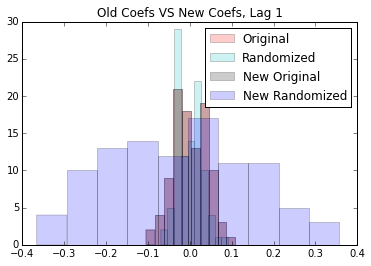

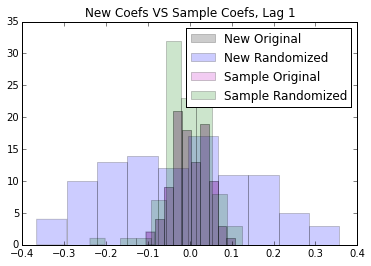

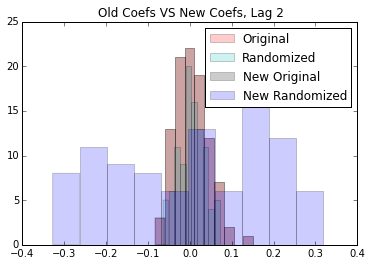

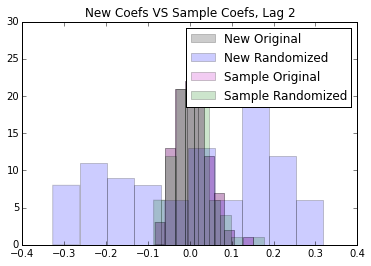

In [7]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 3
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 1
has_reps = True


_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)





print fit_result2
print fit_result2r


for l in range(lag):

    plt.title("Old Coefs VS New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(np.split(coef, lag)[l], color='r', alpha=0.2, label="Original")
    plt.hist(np.split(coefr, lag)[l], color='c', alpha=0.2, label="Randomized")
    plt.hist(np.split(coef2, lag)[l], color='k', alpha=0.2, label="New Original")
    plt.hist(np.split(coef2r, lag)[l], color='b', alpha=0.2, label="New Randomized")
    plt.legend()
    plt.show()
    plt.close()



    plt.title("New Coefs VS Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(np.split(coef2, lag)[l], color='k', alpha=0.2, label="New Original")
    plt.hist(np.split(coef2r, lag)[l], color='b', alpha=0.2, label="New Randomized")
    plt.hist(np.split(coeftemp2, lag)[l], color='m', alpha=0.2, label="Sample Original")
    plt.hist(np.split(coeftemp2r, lag)[l], color='g', alpha=0.2, label="Sample Randomized")
    plt.legend()
    plt.show()
    plt.close()

# Row 5

(100, 12, 4)
{'r2': 0.99480126031994554, 'df': 200.0, 'DW:Lag1': 3.2483433090926566, 'n': 40.0, 'sse': 0.19046896048145853, 'mse': 0.0047617240120364614}
{'r2': 0.99757646117532939, 'df': 200.0, 'DW:Lag1': 3.044006071555807, 'n': 40.0, 'sse': 0.088792466834286363, 'mse': 0.0022198116708571597}


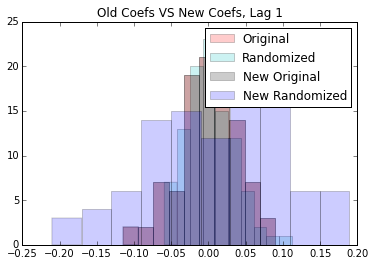

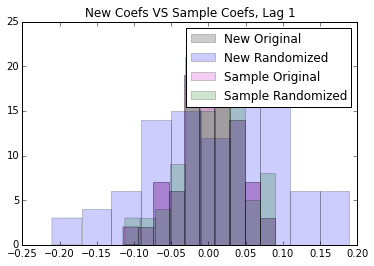

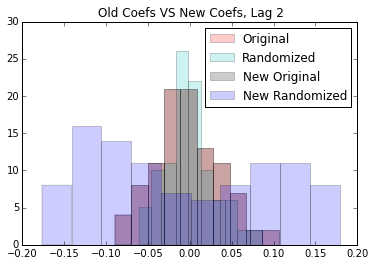

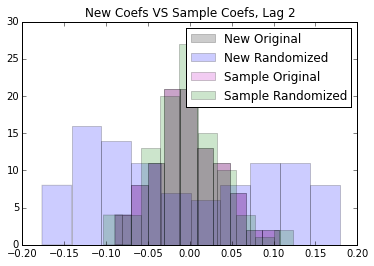

In [8]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 5
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 1
has_reps = True


_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)





print fit_result2
print fit_result2r


for l in range(lag):

    plt.title("Old Coefs VS New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(np.split(coef, lag)[l], color='r', alpha=0.2, label="Original")
    plt.hist(np.split(coefr, lag)[l], color='c', alpha=0.2, label="Randomized")
    plt.hist(np.split(coef2, lag)[l], color='k', alpha=0.2, label="New Original")
    plt.hist(np.split(coef2r, lag)[l], color='b', alpha=0.2, label="New Randomized")
    plt.legend()
    plt.show()
    plt.close()



    plt.title("New Coefs VS Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(np.split(coef2, lag)[l], color='k', alpha=0.2, label="New Original")
    plt.hist(np.split(coef2r, lag)[l], color='b', alpha=0.2, label="New Randomized")
    plt.hist(np.split(coeftemp2, lag)[l], color='m', alpha=0.2, label="Sample Original")
    plt.hist(np.split(coeftemp2r, lag)[l], color='g', alpha=0.2, label="Sample Randomized")
    plt.legend()
    plt.show()
    plt.close()

# Row 7

(100, 12, 4)
{'r2': 0.9977362016442396, 'df': 200.0, 'DW:Lag1': 1.8139876955538421, 'n': 40.0, 'sse': 0.056752576767044198, 'mse': 0.0014188144191761018}
{'r2': 0.99834820302874816, 'df': 200.0, 'DW:Lag1': 1.3079917761307971, 'n': 40.0, 'sse': 0.041409931311208244, 'mse': 0.0010352482827802063}


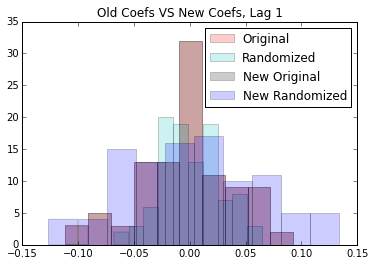

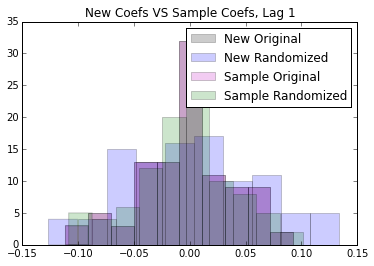

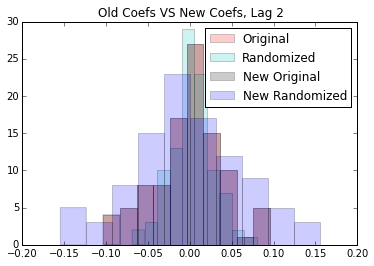

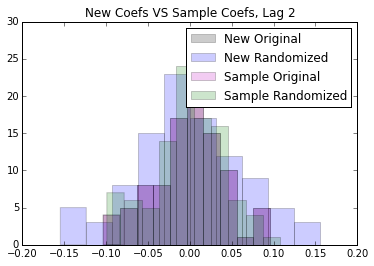

In [9]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 7
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 1
has_reps = True


_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)





print fit_result2
print fit_result2r


for l in range(lag):

    plt.title("Old Coefs VS New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(np.split(coef, lag)[l], color='r', alpha=0.2, label="Original")
    plt.hist(np.split(coefr, lag)[l], color='c', alpha=0.2, label="Randomized")
    plt.hist(np.split(coef2, lag)[l], color='k', alpha=0.2, label="New Original")
    plt.hist(np.split(coef2r, lag)[l], color='b', alpha=0.2, label="New Randomized")
    plt.legend()
    plt.show()
    plt.close()



    plt.title("New Coefs VS Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(np.split(coef2, lag)[l], color='k', alpha=0.2, label="New Original")
    plt.hist(np.split(coef2r, lag)[l], color='b', alpha=0.2, label="New Randomized")
    plt.hist(np.split(coeftemp2, lag)[l], color='m', alpha=0.2, label="Sample Original")
    plt.hist(np.split(coeftemp2r, lag)[l], color='g', alpha=0.2, label="Sample Randomized")
    plt.legend()
    plt.show()
    plt.close()

# Row 9

(100, 12, 4)
{'r2': 0.99043962036956112, 'df': 200.0, 'DW:Lag1': 3.1923192797544813, 'n': 40.0, 'sse': 0.20738160925380808, 'mse': 0.0051845402313451935}
{'r2': 0.99571539476279558, 'df': 200.0, 'DW:Lag1': 2.8037539762656083, 'n': 40.0, 'sse': 0.092940695187439012, 'mse': 0.0023235173796859747}


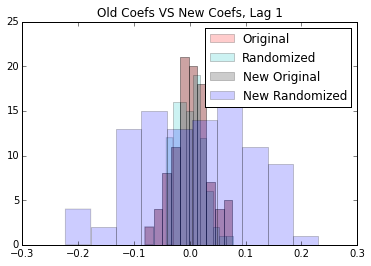

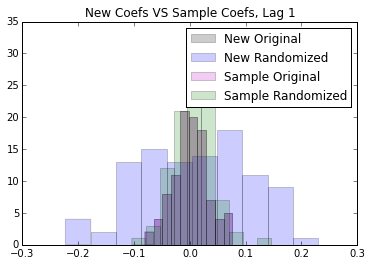

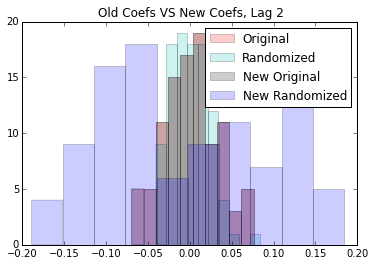

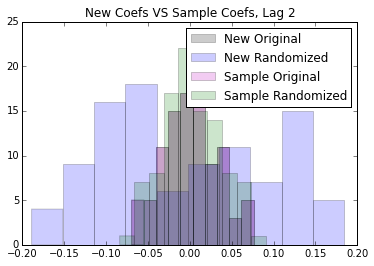

In [10]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 9
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 1
has_reps = True


_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)





print fit_result2
print fit_result2r


for l in range(lag):

    plt.title("Old Coefs VS New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(np.split(coef, lag)[l], color='r', alpha=0.2, label="Original")
    plt.hist(np.split(coefr, lag)[l], color='c', alpha=0.2, label="Randomized")
    plt.hist(np.split(coef2, lag)[l], color='k', alpha=0.2, label="New Original")
    plt.hist(np.split(coef2r, lag)[l], color='b', alpha=0.2, label="New Randomized")
    plt.legend()
    plt.show()
    plt.close()



    plt.title("New Coefs VS Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(np.split(coef2, lag)[l], color='k', alpha=0.2, label="New Original")
    plt.hist(np.split(coef2r, lag)[l], color='b', alpha=0.2, label="New Randomized")
    plt.hist(np.split(coeftemp2, lag)[l], color='m', alpha=0.2, label="Sample Original")
    plt.hist(np.split(coeftemp2r, lag)[l], color='g', alpha=0.2, label="Sample Randomized")
    plt.legend()
    plt.show()
    plt.close()

In [13]:
X_matr = geneTS
rand_X_matr = geneTSr

n = X_matr.shape[0]
    
coef = np.zeros(n * lag)

# This is a vector that shows the coefficient for each set
coef_temps = np.zeros( (n, n*lag))

print "original TS"
print X_matr[0:2]
print "random TS"
print rand_X_matr[0:2]

original TS
[[[ 1.04815008  0.15697452  1.14644533  0.06448708]
  [ 0.35252544  0.36357418  1.76973776  0.54022089]
  [-0.08186088  0.91064576  0.04865903  1.34849226]
  [-0.2044819   0.4812579  -0.07889639  0.26974276]
  [-2.31428473 -0.79642493 -1.33135121 -1.98472909]
  [-0.70075182 -0.6861743   0.38486192  0.30220347]
  [ 0.07686832 -2.32372308 -1.50407265 -0.77589246]
  [ 0.85448847  0.41139869 -0.65562042 -0.80313786]
  [ 1.63210862 -1.09424698 -1.12453682  0.98329854]
  [ 0.0883757   1.53299601  0.87552008  1.46494393]
  [-1.14753839  0.43216449 -0.39433826 -1.16786434]
  [ 0.39640109  0.61155774  0.86359162 -0.24176517]]

 [[-1.38517404 -0.9834013  -0.63246985 -0.33581789]
  [-0.68286158 -1.28910378  1.03681572 -1.3481128 ]
  [ 0.52423681 -0.85858451 -0.1496953  -0.76377525]
  [ 0.10444312  0.37288621 -0.49833842 -0.08629339]
  [-1.06936983  0.11201798 -0.65165272 -0.41095736]
  [-1.27667687  0.26171019 -0.9606004  -1.32473093]
  [-0.67965647 -0.82769828 -1.95986853 -0.52326524

In [16]:
p = 1


# There will be m different fits. fit_result should just average all of the individual fit_results
fit_result_temps = []


X_matr_temp = X_matr.copy()

# replace the predictor row with the randomized row
X_matr_temp[p] = rand_X_matr[p]


print "Temporary version, with row ", p, "replaced"
print X_matr_temp[0:2]

Temporary version, with row  1 replaced
[[[ 1.04815008  0.15697452  1.14644533  0.06448708]
  [ 0.35252544  0.36357418  1.76973776  0.54022089]
  [-0.08186088  0.91064576  0.04865903  1.34849226]
  [-0.2044819   0.4812579  -0.07889639  0.26974276]
  [-2.31428473 -0.79642493 -1.33135121 -1.98472909]
  [-0.70075182 -0.6861743   0.38486192  0.30220347]
  [ 0.07686832 -2.32372308 -1.50407265 -0.77589246]
  [ 0.85448847  0.41139869 -0.65562042 -0.80313786]
  [ 1.63210862 -1.09424698 -1.12453682  0.98329854]
  [ 0.0883757   1.53299601  0.87552008  1.46494393]
  [-1.14753839  0.43216449 -0.39433826 -1.16786434]
  [ 0.39640109  0.61155774  0.86359162 -0.24176517]]

 [[-0.67965647 -0.82769828 -0.27545308 -1.3481128 ]
  [ 0.52423681  0.22672014 -1.95986853  1.38842508]
  [-1.27667687  1.68188785 -0.65165272  1.518701  ]
  [ 0.51438433 -0.0568531  -0.49833842 -0.33581789]
  [-1.06936983  0.11201798  1.69926481  0.67457936]
  [ 0.10444312 -0.9834013  -0.63246985 -1.32473093]
  [ 1.82984178 -0.8585

In [27]:
Y_row = 9
print "Out row:", Y_row
print Y

print "Checking same in the predictor TS"
print (X_matr_temp[Y_row] == Y).all()

Y_matr = Y
replace_rows = [Y_row]

Out row: 9
[[[-1.97408403 -1.93056291 -1.67041413 -1.79729964]
  [-1.65061666 -1.71719056 -0.95127744 -1.35324379]
  [ 0.1579173  -1.15522061 -1.61547363 -1.74022189]
  [ 0.02168635 -0.07213571 -0.64937414  0.15213474]
  [-0.0621923   0.24916045  0.16490809  0.41605288]
  [-0.78840193  0.175448   -0.30913004 -0.00326896]
  [-0.16118403  0.44720469  0.6013916   0.16178296]
  [ 0.46603387  0.41146573  0.28490087  0.84662088]
  [ 1.09325176  0.61951898  1.17095692  1.03151149]
  [ 0.63706246  0.86693011  0.84862766  0.58955038]
  [ 0.72505023  1.34475109  1.48604221  0.60279592]
  [ 1.53547698  0.76063074  0.63884203  1.09358504]]]
Checking same in the predictor TS
True


In [34]:
# X_t_temp is a matrix of T - lag replace_rows where for each row j, i = j + lag-1
#[A_i, B_i, .... Z_i, A_{i-1}, B_{i-1}, .... Z_{i-1}......  A_{i-lag+1}, B_{i-lag+1}, .... Z_{i-lag+1}

print "Lag:", lag

X_t_temp, Y_t_temp = get_XY_lagged(X_matr_temp, Y_matr, lag, replace_rows=replace_rows,
                         has_reps=has_reps)

print "X_t_temp: ", X_t_temp.shape
print "The lag-1 predictors: first vector should correspond with the original row"
print X_t_temp[0:10, 0:3]
print "The lag-2 predictors: "
print X_t_temp[0:10, 0 + n :3 + n]

print "Y_t_temp:", Y_t_temp.shape
print Y_t_temp[0:10]

print "For the second replicate:"
print "The lag-1 predictors: first vector should correspond with the original row"
print X_t_temp[10:20, 0:3]
print "The lag-2 predictors: "
print X_t_temp[10:20, 0 + n :3 + n]

print "Y_t_temp:", Y_t_temp.shape
print Y_t_temp[10:20]

Lag: 2
X_t_temp:  (40, 200)
The lag-1 predictors: first vector should correspond with the original row
[[-1.65061666  0.35252544  0.52423681]
 [ 0.1579173  -0.08186088 -1.27667687]
 [ 0.02168635 -0.2044819   0.51438433]
 [-0.0621923  -2.31428473 -1.06936983]
 [-0.78840193 -0.70075182  0.10444312]
 [-0.16118403  0.07686832  1.82984178]
 [ 0.46603387  0.85448847 -0.08263607]
 [ 1.09325176  1.63210862  1.2542031 ]
 [ 0.63706246  0.0883757  -1.38517404]
 [ 0.72505023 -1.14753839  0.94926572]]
The lag-2 predictors: 
[[-1.97408403  1.04815008 -0.67965647]
 [-1.65061666  0.35252544  0.52423681]
 [ 0.1579173  -0.08186088 -1.27667687]
 [ 0.02168635 -0.2044819   0.51438433]
 [-0.0621923  -2.31428473 -1.06936983]
 [-0.78840193 -0.70075182  0.10444312]
 [-0.16118403  0.07686832  1.82984178]
 [ 0.46603387  0.85448847 -0.08263607]
 [ 1.09325176  1.63210862  1.2542031 ]
 [ 0.63706246  0.0883757  -1.38517404]]
Y_t_temp: (40, 1)
[[ 0.1579173 ]
 [ 0.02168635]
 [-0.0621923 ]
 [-0.78840193]
 [-0.16118403]

In [37]:
X_t_orig, Y_t_orig = get_XY_lagged(X_matr, Y_matr, lag, replace_rows=replace_rows,
                         has_reps=has_reps)

# Conclusion: the lagged generation is correct.

In [44]:
fit_method = fit_ridge

print "Fit method is ", fit_method
print "hyperparameter is ", hyper

Y_pred_temp, coef_temp, intercept_temp, fit_result_temp = fit_method(X_t_temp, Y_t_temp, hyper=hyper)
Y_pred_orig, coef_orig, intercept_orig, fit_result_orig = fit_method(X_t_orig, Y_t_orig, hyper=hyper)


print "Same output Ys: ", (Y_t_orig == Y_t_temp).all()

print "Output Ys:", Y_t_orig.shape
print Y_t_orig[0:10]

print "Y_pred_orig:", Y_pred_orig.shape
print Y_pred_orig[0:10]

print "Y_pred_temp:", Y_pred_temp.shape
print Y_pred_temp[0:10]

Fit method is  <function fit_ridge at 0x108cb2cf8>
hyperparameter is  1
Same output Ys:  True
Output Ys: (40, 1)
[[ 0.1579173 ]
 [ 0.02168635]
 [-0.0621923 ]
 [-0.78840193]
 [-0.16118403]
 [ 0.46603387]
 [ 1.09325176]
 [ 0.63706246]
 [ 0.72505023]
 [ 1.53547698]]
Y_pred_orig: (40, 1)
[[ 0.12711907]
 [ 0.02206529]
 [-0.06240264]
 [-0.76028788]
 [-0.14848124]
 [ 0.62936549]
 [ 0.72906548]
 [ 0.82876547]
 [ 0.71240702]
 [ 1.52681896]]
Second replciate:
[[ 0.12711907]
 [ 0.02206529]
 [-0.06240264]
 [-0.76028788]
 [-0.14848124]
 [ 0.62936549]
 [ 0.72906548]
 [ 0.82876547]
 [ 0.71240702]
 [ 1.52681896]]
Y_pred_temp: (40, 1)
[[ 0.13199504]
 [ 0.022671  ]
 [-0.06792099]
 [-0.7562124 ]
 [-0.15440522]
 [ 0.51033876]
 [ 0.97389388]
 [ 0.7025368 ]
 [ 0.71781145]
 [ 1.51561237]]
Second replciate:
[[ 0.13199504]
 [ 0.022671  ]
 [-0.06792099]
 [-0.7562124 ]
 [-0.15440522]
 [ 0.51033876]
 [ 0.97389388]
 [ 0.7025368 ]
 [ 0.71781145]
 [ 1.51561237]]


# Conclusion: similar resultant fits. Now check coefs.

In [47]:
print "coef_orig:", coef_orig.shape
print "Lag 1: first is the self- vectors, second is the first few rows"
print coef_orig[0:3]

print "Lag 2: first is the self- vectors, second is the first few rows"
print coef_orig[n: 3 + n]


print "coef_temp:", coef_temp.shape
print "Lag 1: first is the self- vectors, second is the first few rows"
print coef_temp[0:3]

print "Lag 2: first is the self- vectors, second is the first few rows"
print coef_temp[n: 3 + n]

coef_orig: (200, 1)
Lag 1: first is the self- vectors, second is the first few rows
[[-0.00600166]
 [ 0.06557763]
 [ 0.00592755]]
Lag 2: first is the self- vectors, second is the first few rows
[[ 0.03069061]
 [ 0.01550546]
 [-0.05710762]]
coef_temp: (200, 1)
Lag 1: first is the self- vectors, second is the first few rows
[[-0.00935049]
 [ 0.05891209]
 [-0.03705837]]
Lag 2: first is the self- vectors, second is the first few rows
[[ 0.02017538]
 [-0.01886728]
 [ 0.16891662]]


In [49]:
# Confirm the setting of the coefficient
# WRONG COEF BEING FIT: SCREW ALIGN COEFS?

# soln:
# remove all align_coef code
# run an original version
# check align coef now.


# since the first coef of all should be the alpha, do p + 1 instead

coef[p: p + (lag - 1) * n + 1: n] = 0
print coef

coef[p + 1: p + (lag - 1) * n + 2: n] = coef_temp[p + 1: p + (lag - 1) * n + 2: n].flatten()

print coef


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.          0.         -0.03705837  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.     

# It's real. It is indeed finding much higher coefficients for the permuted row in this case...

# WHEN COME BACK:
* Update perform_test_random to do normal coefficients as we should, w/o alignment
* Still confirm same coef generation...

# To confirm, let's repeat for another random row: 68

# There is a wider spread of coefficients for the random vector compared with the original.

(100, 12, 4)
{'r2': 0.99043962036956124, 'df': 200.0, 'DW:Lag1': 3.1923192797544799, 'n': 40.0, 'sse': 0.20738160925380819, 'mse': 0.0051845402313452213}
{'r2': 0.99576868541323227, 'df': 200.0, 'DW:Lag1': 2.799829074210165, 'n': 40.0, 'sse': 0.091784726358485794, 'mse': 0.0022946181589621438}
##################################################
LAG  1
##################################################


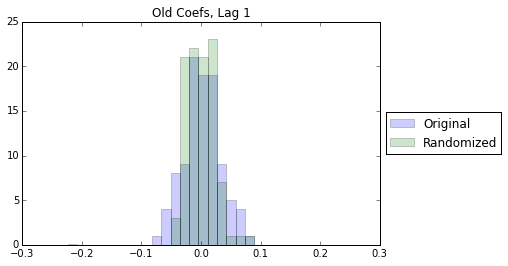

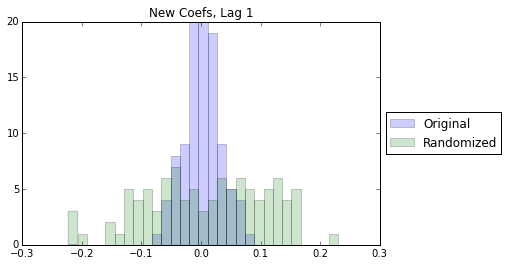

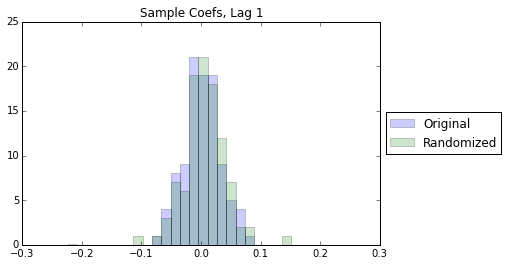

##################################################
LAG  2
##################################################


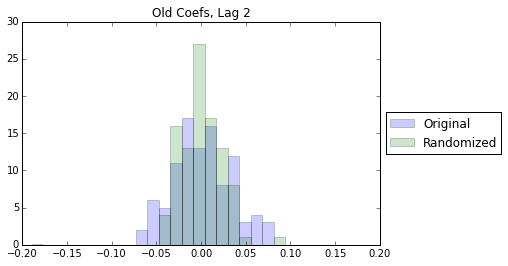

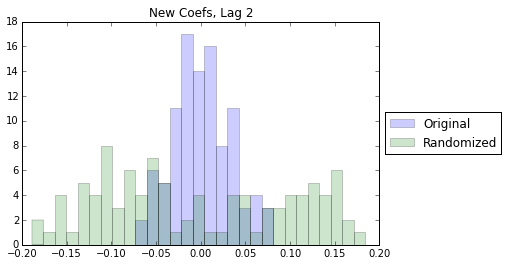

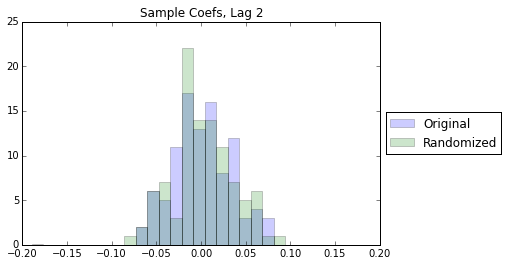

In [32]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 9
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 1
has_reps = True
nbins = 30


_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)





print fit_result2
print fit_result2r


for l in range(lag):

    print "##################################################"
    print "LAG ", l + 1
    print "##################################################"
    
    
    old_coef = np.split(coef, lag)[l]
    old_coefr = np.split(coefr, lag)[l]
    
    new_coef = np.split(coef2, lag)[l]
    new_coefr = np.split(coef2r, lag)[l]
    
    sample_coef = np.split(coeftemp2, lag)[l]
    sample_coefr = np.split(coeftemp2r, lag)[l]
    

    pboth = np.concatenate((sample_coef, sample_coefr, new_coef, new_coefr, old_coef, old_coefr))
    bins = np.linspace(min(pboth), max(pboth), nbins)
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Old Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(new_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(new_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(sample_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(sample_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

    
    
    
# comparison figure
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("Old Coefs VS New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
#     plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()
    
    
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("New Coefs VS Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     plt.hist(sample_coef,  alpha=0.2, label="Sample Original", bins=bins)
#     plt.hist(sample_coefr, alpha=0.2, label="Sample Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()

## Try for diff hyperparameter, diff row

(100, 12, 4)
{'r2': 0.71909203488201823, 'df': 200.0, 'DW:Lag1': 2.4055516296041826, 'n': 40.0, 'sse': 9.8614148137319493, 'mse': 0.24653537034329889}
{'r2': 0.72248703363380296, 'df': 200.0, 'DW:Lag1': 2.4017485454990188, 'n': 40.0, 'sse': 9.7422316820988542, 'mse': 0.24355579205247127}
##################################################
LAG  1
##################################################


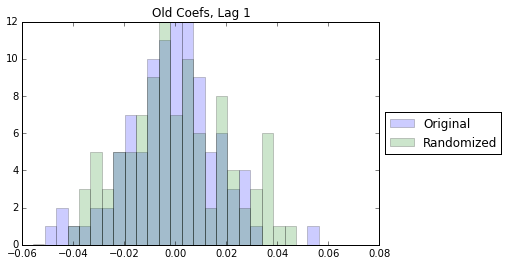

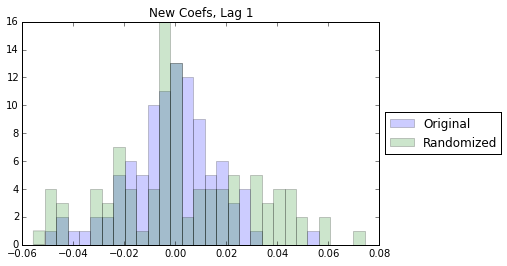

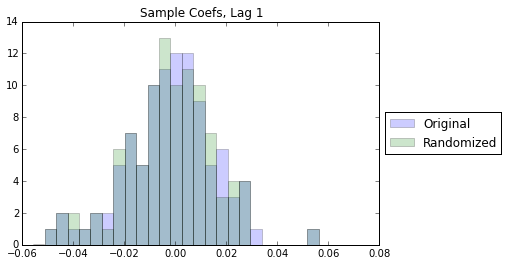

##################################################
LAG  2
##################################################


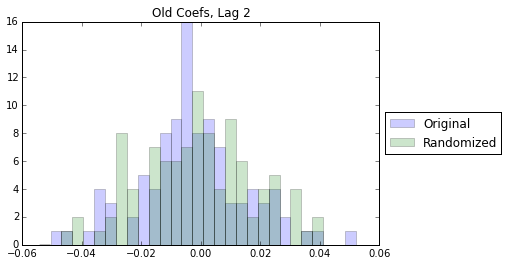

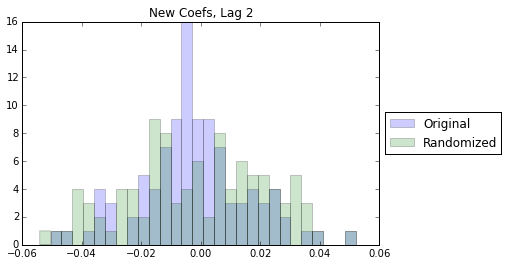

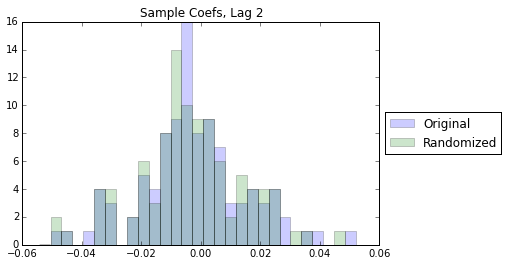

In [33]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 68
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 100
has_reps = True
nbins = 30


_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)





print fit_result2
print fit_result2r


for l in range(lag):

    print "##################################################"
    print "LAG ", l + 1
    print "##################################################"
    
    
    old_coef = np.split(coef, lag)[l]
    old_coefr = np.split(coefr, lag)[l]
    
    new_coef = np.split(coef2, lag)[l]
    new_coefr = np.split(coef2r, lag)[l]
    
    sample_coef = np.split(coeftemp2, lag)[l]
    sample_coefr = np.split(coeftemp2r, lag)[l]
    

    pboth = np.concatenate((sample_coef, sample_coefr, new_coef, new_coefr, old_coef, old_coefr))
    bins = np.linspace(min(pboth), max(pboth), nbins)
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Old Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(new_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(new_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(sample_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(sample_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

    
    
    
# comparison figure
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("Old Coefs VS New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
#     plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()
    
    
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("New Coefs VS Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     plt.hist(sample_coef,  alpha=0.2, label="Sample Original", bins=bins)
#     plt.hist(sample_coefr, alpha=0.2, label="Sample Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()

## Row 3

(100, 12, 4)
{'r2': 0.84955495815253823, 'df': 200.0, 'DW:Lag1': 2.4262086832889551, 'n': 40.0, 'sse': 5.810942482579498, 'mse': 0.14527356206448708}
{'r2': 0.85215411210359837, 'df': 200.0, 'DW:Lag1': 2.4255835699012027, 'n': 40.0, 'sse': 5.7105501138612889, 'mse': 0.14276375284653223}
##################################################
LAG  1
##################################################


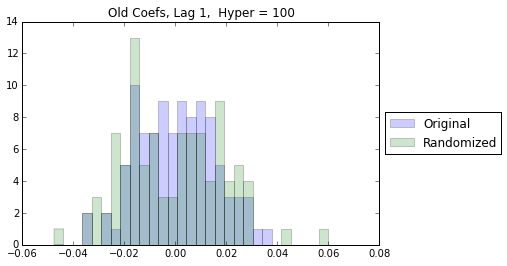

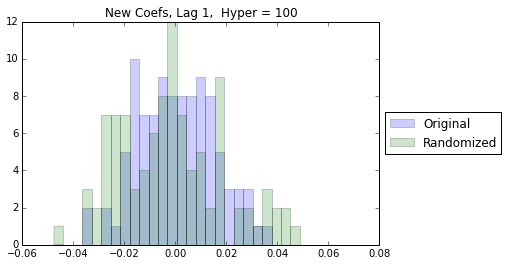

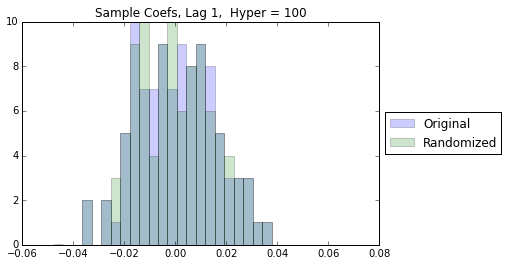

##################################################
LAG  2
##################################################


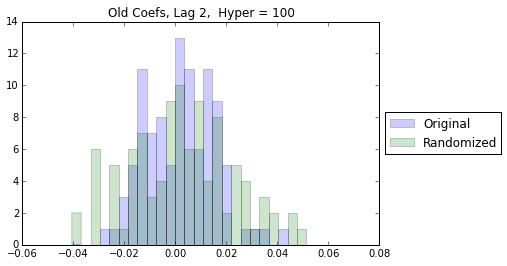

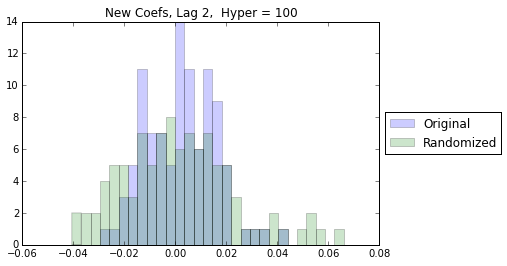

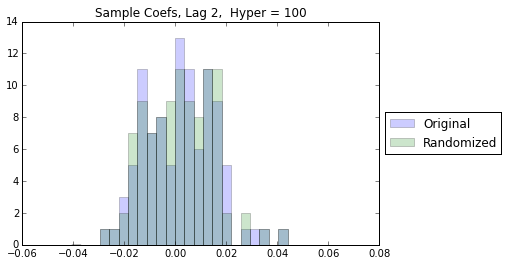

In [38]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 3
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 100
has_reps = True
nbins = 30


_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)





print fit_result2
print fit_result2r


for l in range(lag):

    print "##################################################"
    print "LAG ", l + 1
    print "##################################################"
    
    
    old_coef = np.split(coef, lag)[l]
    old_coefr = np.split(coefr, lag)[l]
    
    new_coef = np.split(coef2, lag)[l]
    new_coefr = np.split(coef2r, lag)[l]
    
    sample_coef = np.split(coeftemp2, lag)[l]
    sample_coefr = np.split(coeftemp2r, lag)[l]
    

    pboth = np.concatenate((sample_coef, sample_coefr, new_coef, new_coefr, old_coef, old_coefr))
    bins = np.linspace(min(pboth), max(pboth), nbins)
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Old Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(new_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(new_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(sample_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(sample_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

    
    
    
# comparison figure
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("Old Coefs VS New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
#     plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()
    
    
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("New Coefs VS Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     plt.hist(sample_coef,  alpha=0.2, label="Sample Original", bins=bins)
#     plt.hist(sample_coefr, alpha=0.2, label="Sample Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()

So, we get more similar results with a similar hyperparameter. Good :)

Now try a lower hyperparameter...

(100, 12, 4)
{'r2': 0.9831992147834816, 'df': 200.0, 'DW:Lag1': 3.3334653902530822, 'n': 40.0, 'sse': 0.64893063511096294, 'mse': 0.016223265877774052}
{'r2': 0.99970106740769371, 'df': 200.0, 'DW:Lag1': 3.095919057511086, 'n': 40.0, 'sse': 0.011546276824607073, 'mse': 0.00028865692061517668}
##################################################
LAG  1
##################################################


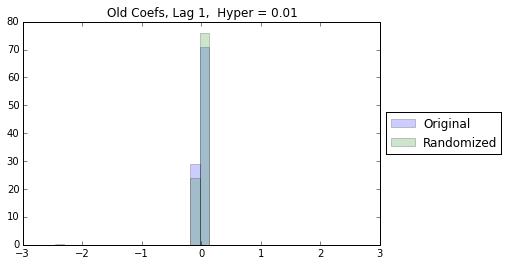

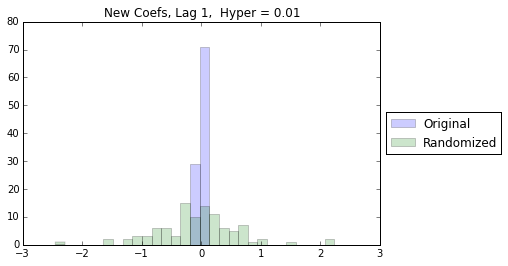

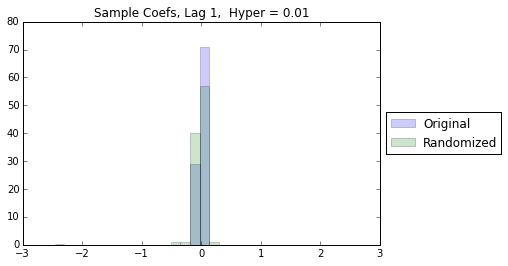

##################################################
LAG  2
##################################################


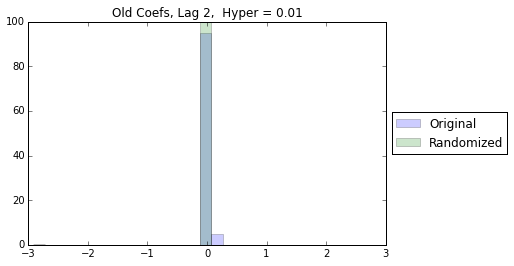

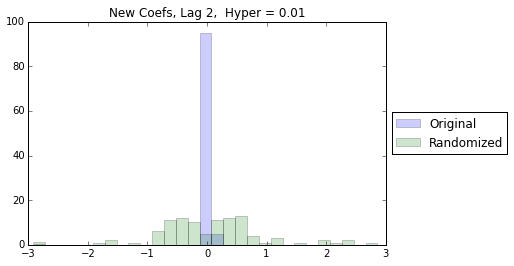

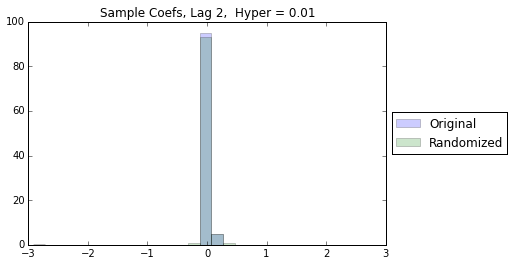

In [37]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 3
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 0.01
has_reps = True
nbins = 30


_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)





print fit_result2
print fit_result2r


for l in range(lag):

    print "##################################################"
    print "LAG ", l + 1
    print "##################################################"
    
    
    old_coef = np.split(coef, lag)[l]
    old_coefr = np.split(coefr, lag)[l]
    
    new_coef = np.split(coef2, lag)[l]
    new_coefr = np.split(coef2r, lag)[l]
    
    sample_coef = np.split(coeftemp2, lag)[l]
    sample_coefr = np.split(coeftemp2r, lag)[l]
    

    pboth = np.concatenate((sample_coef, sample_coefr, new_coef, new_coefr, old_coef, old_coefr))
    bins = np.linspace(min(pboth), max(pboth), nbins)
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Old Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(new_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(new_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(sample_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(sample_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

    
    
    
# comparison figure
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("Old Coefs VS New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
#     plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()
    
    
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("New Coefs VS Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     plt.hist(sample_coef,  alpha=0.2, label="Sample Original", bins=bins)
#     plt.hist(sample_coefr, alpha=0.2, label="Sample Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()

According to the run, there should be several significant ones involving row 1.



(100, 12, 4)
{'r2': 0.72966239373562791, 'df': 200.0, 'DW:Lag1': 2.0841813154106803, 'n': 40.0, 'sse': 10.486745645765261, 'mse': 0.26216864114413135}
{'r2': 0.73449825373907374, 'df': 200.0, 'DW:Lag1': 2.0835971629035224, 'n': 40.0, 'sse': 10.299156377163509, 'mse': 0.25747890942908774}
##################################################
LAG  1
##################################################


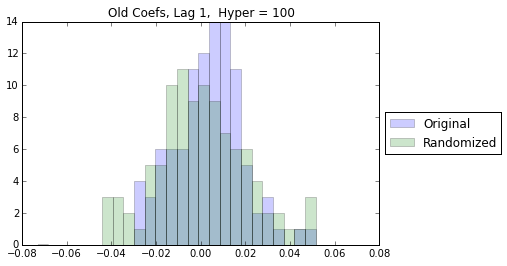

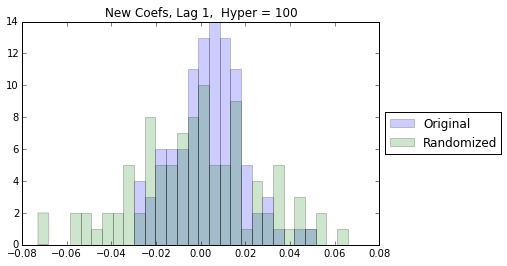

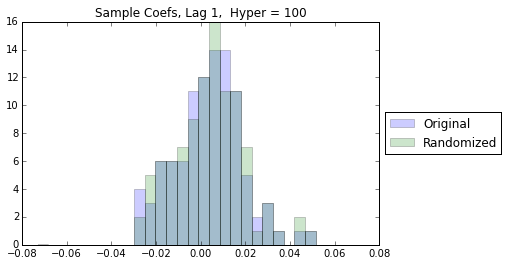

##################################################
LAG  2
##################################################


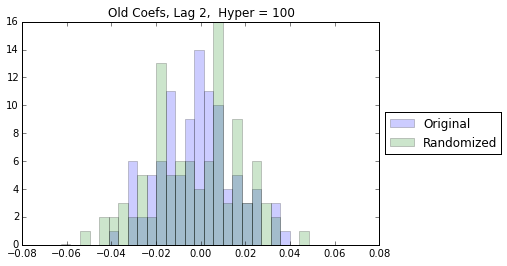

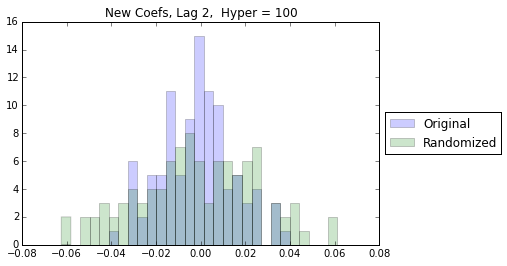

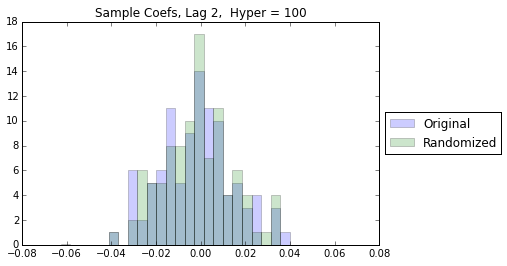

In [39]:
data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps.txt"
rand_data_file = "small_er-reg-cutoff-2-plus-GR-0mean1var-reps-rand.txt"


dfs, genes, geneTS, df, __, __  = gtm.load_rep_file_list(data_file)
dfsr, genesr, geneTSr, dfr, __, __  = gtm.load_rep_file_list(rand_data_file)


print geneTS.shape

Y_row = 1
Y = geneTS[Y_row].reshape((1, geneTS.shape[1], geneTS.shape[2]))


lag = 2
hyper = 100
has_reps = True
nbins = 30


_, _, _, coef, _, _ = perform_test(geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)
_, _, _, coefr, _, _ = perform_test(geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, hyper=hyper)

coef2, fit_result2, coeftemp2, coeftemps = perform_test_random(geneTS, geneTS, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)
coef2r, fit_result2r, coeftemp2r, coeftempsr = perform_test_random(geneTS, geneTSr, Y, lag, fit_ridge, replace_row=Y_row, has_reps=has_reps, verbose=False, hyper=hyper)





print fit_result2
print fit_result2r


for l in range(lag):

    print "##################################################"
    print "LAG ", l + 1
    print "##################################################"
    
    
    old_coef = np.split(coef, lag)[l]
    old_coefr = np.split(coefr, lag)[l]
    
    new_coef = np.split(coef2, lag)[l]
    new_coefr = np.split(coef2r, lag)[l]
    
    sample_coef = np.split(coeftemp2, lag)[l]
    sample_coefr = np.split(coeftemp2r, lag)[l]
    

    pboth = np.concatenate((sample_coef, sample_coefr, new_coef, new_coefr, old_coef, old_coefr))
    bins = np.linspace(min(pboth), max(pboth), nbins)
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Old Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(new_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(new_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
    plt.title("Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
    plt.hist(sample_coef, alpha=0.2, label="Original", bins=bins)
    plt.hist(sample_coefr, alpha=0.2, label="Randomized", bins=bins)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

    
    
    
# comparison figure
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("Old Coefs VS New Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(old_coef, alpha=0.2, label="Original", bins=bins)
#     plt.hist(old_coefr, alpha=0.2, label="Randomized", bins=bins)
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()
    
    
    
#     plt.figure(figsize=(8,4))
#     ax = plt.subplot(111)
#     plt.title("New Coefs VS Sample Coefs, Lag " + str(l + 1) + ",  Hyper = " + str(hyper))
#     plt.hist(new_coef, alpha=0.2, label="New Original", bins=bins)
#     plt.hist(new_coefr,  alpha=0.2, label="New Randomized", bins=bins)
#     plt.hist(sample_coef,  alpha=0.2, label="Sample Original", bins=bins)
#     plt.hist(sample_coefr, alpha=0.2, label="Sample Randomized", bins=bins)
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#     plt.close()

# Might have artefacts because so little predictor genes. Let's just run with it

In [56]:
from fit_methods import get_XY_lagged, fit_ridge, fit_lasso, perform_test


def perform_test_random(X_matr, rand_X_matr, Y_matr, lag, fit_method, replace_row,
                 has_reps=False, verbose=False, **kwargs):
    """
    Perform a single fit.
    
    X_matr: n x T (x r) matrix of input genes
    rand_X_matr: n x T (x r) matrix of randomized input genes, where randomized across time.
    Y_matr: 1 x T (x r) matrix of output gene
    lag: lag
    fit_method: one of the fit_ methods, e.g. fit_lasso
    hyper: hyperparams for calling test
    replace_rows: which row Y_matr is in in X. Set to None, otherwise. If it is inside, set the coefficients to zero.

    return: coef, intercept, fit_result. Note the 0, i * lag indices of the coef are for the output genes.
    """

    ## Get X and Y lagged

    # iterate through all possible predictors
    
    n = X_matr.shape[0]
    T = X_matr.shape[1]
    
    coef = np.zeros(n * lag)
    
    coef_temps = np.zeros( (n*lag, n))
    intercept_temps = np.zeros((1, n))
    
    # There will be m different fits. fit_result should just average all of the individual fit_results
    fit_result_temps = []
    
    X_t_orig, Y_t_orig = get_XY_lagged(X_matr, Y_matr, lag, replace_row=replace_row,
                                     has_reps=has_reps)
    Y_pred_orig, coef_orig, intercept_orig, fit_result_orig = fit_method(X_t_orig, Y_t_orig, **kwargs)
            
    
    
    for p in range(n):
        
        if p != replace_row:

            X_matr_temp = X_matr.copy()

            # replace the predictor row with the randomized row
            X_matr_temp[p] = rand_X_matr[p]



            # X_t_temp is a matrix of T - lag replace_rows where for each row j, i = j + lag-1
            #[A_i, B_i, .... Z_i, A_{i-1}, B_{i-1}, .... Z_{i-1}......  A_{i-lag+1}, B_{i-lag+1}, .... Z_{i-lag+1}

            X_t_temp, Y_t_temp = get_XY_lagged(X_matr_temp, Y_matr, lag, replace_row=replace_row,
                                     has_reps=has_reps)




            # coef_temp is (A_i, B_i, .... Z_i, A_{i-1}, B_{i-1}, .... Z_{i-1}......  A_{i-lag+1}, B_{i-lag+1}, .... Z_{i-lag+1}, 1)

            # we only want the p, p + n,... p + (lag - 1) * n indices. 
            Y_pred_temp, coef_temp, intercept_temp, fit_result_temp = fit_method(X_t_temp, Y_t_temp, **kwargs)
            
            # Not
            coef[p: p + (lag - 1) * n + 1: n] = coef_temp[p : p + (lag - 1) * n + 1: n].flatten()

            # Store in the list of all coefs
            coef_temps[:, p] = coef_temp.flatten()
            
            intercept_temps[:, p] = intercept_temp


            fit_result_temps.append(fit_result_temp)

            if verbose:

                print "Original TS: ", X_matr[p]
                print "Randomized TS: ", X_matr_temp[p]
                
                print "Original X_t: ", X_t_orig[:T - lag, p:-1:n]
                print "Randomized X_t", X_t_temp[:T - lag, p:-1:n]
                
                print "Same Y_t?", (Y_t_orig == Y_t_temp).all()
                
                print "Orig coefs: ", coef_orig[p: lag * n + 1: n]
                print "Right around: "
                print coef_orig[p - 1: lag * n + 1: n]
                print coef_orig[p + 1: lag * n + 1: n]

                print "Updated coefs: ", coef_temp[p: lag * n + 1: n]
                print "Right around: "
                print coef_temp[p - 1: lag * n + 1: n]
                print coef_temp[p + 1: lag * n + 1: n]
                
                print "Updated coefs:", coef
                print "Y_pred_temp", Y_pred_temp

    coef = coef.reshape(n * lag, 1)
            
    fit_result_temps_df = pd.DataFrame(fit_result_temps)
    
    fit_result_std_dict = fit_result_temps_df.std()
    
    fit_result = fit_result_temps_df.mean().to_dict()
    
    keys = fit_result.keys()
    
    for key in keys:
        fit_result[key + "_mean"] = fit_result[key] # LEFT OFF HERE 1/25
        del fit_result[key]
        fit_result[key + "_std"] = fit_result_std_dict[key]
        
    return coef, fit_result, coef_temp, coef_temps, intercept_temps

In [57]:
# NOT DONE

def fit_all_random(X_matr, rand_X_matr, Y_matr, rows, lag, fit_method, save_prefix=None, save_XY=True, verbose=False,
            has_reps=False, **kwargs):
    """
    X_matr: m x T (x r) of X's
    rand_X_matr: m x T ( x r) of X's. Same as X_matr except each row (within each replicate) is permuted independently and randomly
    Y_matr: n x T (x r) of Y's
    rows: rows of X to replace in Y. There should be as many rows to replace in X_matr as there are in Y_matr
    lag:
    fit_method:

    Perform the fit for each Y_matr
    Save each X_t and Y_t?


    Return: coefs: (m*(lag), m) with the columns n (corresponding w/ rows in X_matr) filled in, intercepts: (1, m), fit_result_df: (n, num_results)
    """

    assert len(rows) == Y_matr.shape[0]
    assert X_matr.shape[1] == Y_matr.shape[1]
    assert rand_X_matr.shape[1] == X_matr.shape[1]

    if has_reps:
        assert X_matr.shape[2] == Y_matr.shape[2]
        assert rand_X_matr.shape[2] == X_matr.shape[2]


    m = X_matr.shape[0]
    n = Y_matr.shape[0]
    T = X_matr.shape[1]

    coefs = np.zeros((m*lag, m))
    
    # We keep no intercepts
    # intercepts = np.zeros((1, m, m))

    fit_results = []

    for i, row in zip(range(n), rows):
        if has_reps:
            Y = np.reshape(Y_matr[i,], (1, T, Y_matr.shape[2]))

        else:
            Y = np.reshape(Y_matr[i,], (1, T))


        fit_result_dict = collections.OrderedDict()
        fit_result_dict["row"] = row
        if "hyper" in kwargs:
            fit_result_dict["hyper"] = kwargs["hyper"]
            
            
        

        coef, fit_result, coef_temp, coef_temps, intercept_temps = perform_test_random(X_matr=X_matr, rand_X_matr=rand_X_matr,
                                                                        Y_matr=Y,
                                                                    lag=lag, fit_method=fit_method,
                                                                    replace_row=row,
                                                                        has_reps=has_reps,
                                                                        **kwargs)
        fit_result_dict.update(fit_result)

        # These are cause by effect
        coefs[:, row] = coef.flatten()
        #intercepts[:, row] = intercept
        
        fit_results.append(fit_result_dict)



        if verbose:
            print i, row
            print "X: ", X_matr
            print "Y: ", Y
#             print "X_t: ", X_t
#             print "Y_t: ", Y_t
#             print "Y_pred: ", Y_pred
#             print "Checking Y_pred: ", fm.compute_fit(X_t, Y_t, coef, intercept)
            print "coef: ", coef
            print "fit result: ", fit_result

    fit_result_df = pd.DataFrame(fit_results)

    return coefs, fit_result_df